# Overview
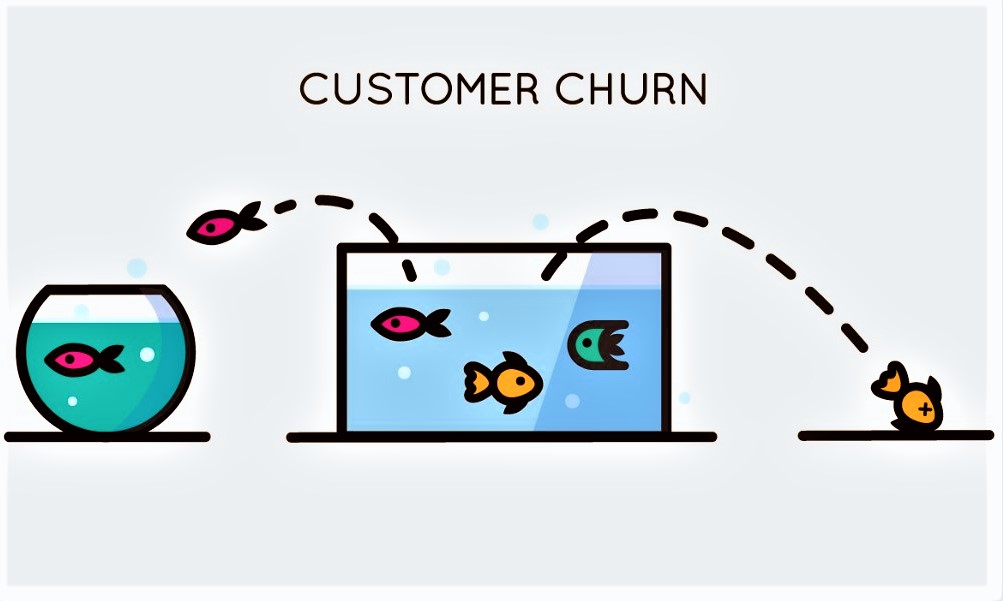

Customer churn is one of the biggest challenges that companies face today. Be it be in banking, retail, telecommunication, hospitality or any engineering or e-commerce industry.

Our goal is to analyse on such set of data identify the point at issue and explore oppurtunities to mitigate it. We will come up with a few models that can predict the possible high risk customers help the company to take preventive measures.

# Table of Content

- <a href='#0'>0. Importing Libraries</a>

- <a href='#0.1'>0.1 Setting up Environment</a>

- <a href='#1'>1. Data Overview</a>
    - <a href='#1.1'>1.1. Missing Data</a>
    - <a href='#1.2'>1.1. Data wrangling</a>
    
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1. Customer attrition in data</a>
    - <a href='#2.2'>2.2. Analysing Categorical Variables</a>
    - <a href='#2.3'>2.3. Summary Tables</a>
    - <a href='#2.4'>2.4. Demographics</a>
    - <a href='#2.5'>2.5. Analysing Continous Variables</a>
    
- <a href='#3'>3. Data preprocessing</a>
    - <a href='#3.1'>3.1. Identifying Columns</a>
    - <a href='#3.2'>3.2. Label Encoding</a>
    - <a href='#3.3'>3.3. Corelation Matix</a>
    - <a href='#3.4'>3.4. One-Hot Encoding</a>
    - <a href='#3.5'>3.5. Train-test split</a>
    - <a href='#3.6'>3.6. Feature Scaling</a>
    
 - <a href='#4'>4. Model Building</a>
    - <a href='#4.1'>4.1. Logistic Regression</a>
    - <a href='#4.2'>4.2. Support Vector Classifier</a>
    - <a href='#4.3'>4.3. K-Nearest Neighbors</a>
    - <a href='#4.4'>4.4. Decision Tree</a>
    - <a href='#4.5'>4.5. Random Forest</a>
    - <a href='#4.6'>4.6. Naive Bayes</a>
    - <a href='#4.7'>4.7. Artificial Neural Network</a>    
    
- <a href='#5'>5. Prediction and Model Performance</a>
    - <a href='#5.1'>5.1. Logistic Regression</a>
    - <a href='#5.2'>5.2. Support Vector Classifier</a>
    - <a href='#5.3'>5.3. Kernel Classifier</a>
    - <a href='#5.4'>5.4. K-Nearest Neighbors</a>
    - <a href='#5.5'>5.5. Decision Tree </a>
    - <a href='#5.6'>5.6. Random Forest Classifier</a>
    - <a href='#5.7'>5.7. Naive Bayes Classifier</a>
    - <a href='#5.8'>5.8. Artificial Neural Network</a>

- <a href='#6'>6. Model Comparision</a>
    - <a href='#6.1'>6.1. Summary Table</a>


# <a id='0'>0.Importing Libraries</a>

In [1]:
##Standard Libraries for data handling
import numpy as np
import pandas as pd

##Standard Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix as pcm
import plotly.graph_objects as go

## Finding the area under the curve
from scipy import integrate

##For data summarize
import sidetable

##Libraries for Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##Libraries for Model building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

##Library for Model performance
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import average_precision_score,recall_score

## Libraries for Deep Models
from keras.models import Sequential
from keras.layers import Dense

##Setting up environment
import os
import pylab

Using TensorFlow backend.


# <a id='0.1'>0.1 Setting up environtment</a>

In [2]:
pylab.rc('figure', figsize=(10,7))

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# <a id='1'>1. Data overview</a>

In [3]:
os.chdir('D:\Study\Deep-LearningA-Z\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 1 - Artificial Neural Networks (ANN)\Section 4 - Building an ANN\Artificial_Neural_Networks')
dataset = pd.read_csv('Telco_Churn.csv')

In [4]:
dataset.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# <a id='1.1'>1.1 Missing Values</a>

First thing first, lets inspect if we have any missing data. Not even 1, so we're golden here. Let's move ahead and visualise some of the metrics, their distribution and dependencies on others.

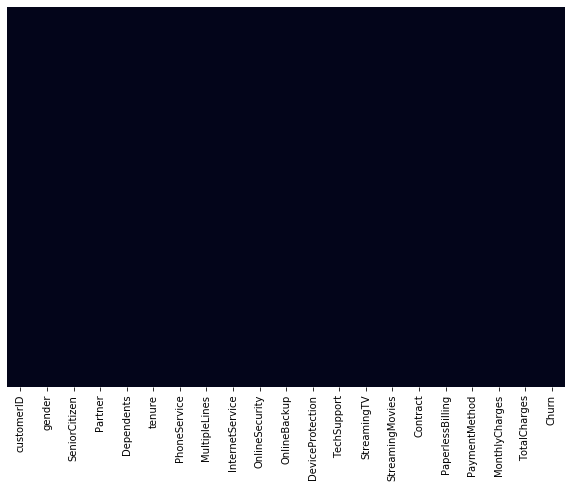

In [5]:
sns.heatmap(dataset.isna(),cbar=False,yticklabels=False);

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# <a id='1.2'>1.2 Data Wrangling</a>

Total Charges should have been float, but for some reason is in text format. Let's fix that before proceeding.

In [7]:
dataset["TotalCharges"]=[i.strip() for i in dataset["TotalCharges"]]
dataset["TotalCharges"]=pd.to_numeric(dataset["TotalCharges"], downcast="float")

Let's check for missing data again.

In [8]:
dataset.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have a few NaN values for `TotalCharges`. Considering it's too small compared to the sample size we can drop these values.
However, 1 thing to notice is `TotalCharges` roughly amounts to the product of `tenure` and `MonthlyCharges`. We can replace the values for the missing rows as per this observation/assumption. So let's look at the rows with missing values.

In [9]:
Null_values=dataset["TotalCharges"].isna()
dataset[Null_values]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

Makes even more sense now. Since the tenure is 0 for each of the records, there is no `TotalCharges` on these accounts. However, let's stick to our argument and fill these rows instead of dropping them.

In [10]:
dataset=dataset.fillna(0)

From the data we have, `26.5%` of all the users have left the carrier, which is excruciating. But this may be just a small sample and may not represent the distribution of actual data. 

# <a id='2'>2. Exploratory Data Analysis</a>

# <a id='2.1'>2.1 Customer Attrition in Data</a>

Text(0.5, 1.0, '% of Attrition')

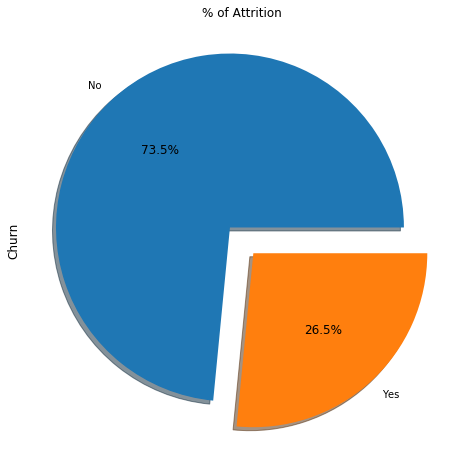

In [11]:
dataset['Churn'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8));
plt.title("% of Attrition")

# <a id='2.2'>2.2 Analysing Categorical Attributes</a>

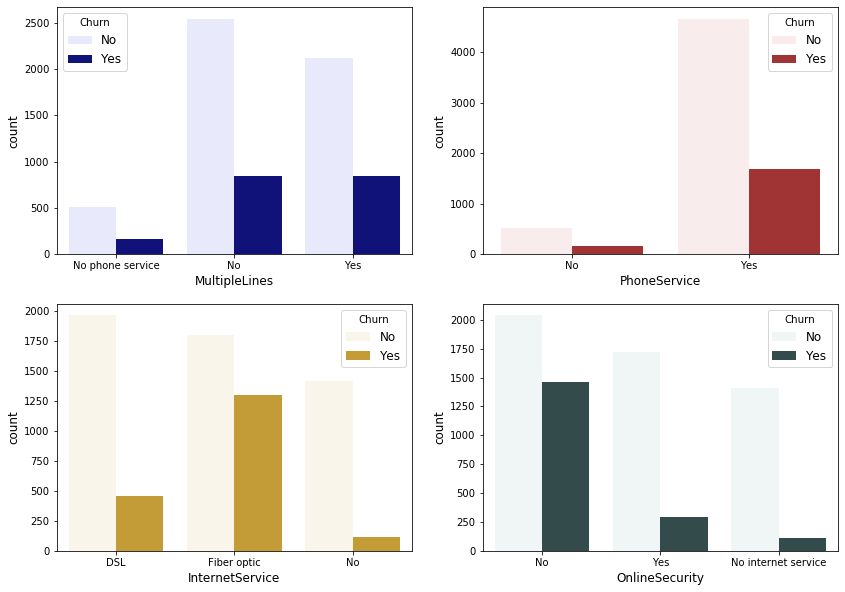

In [12]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('MultipleLines',hue='Churn',data=dataset,color='darkblue',ax=ax[0,0])
sns.countplot('PhoneService',hue='Churn',data=dataset,color='firebrick',ax=ax[0,1])
sns.countplot('InternetService',hue='Churn',data=dataset,color='goldenrod',ax=ax[1,0])
sns.countplot('OnlineSecurity',hue='Churn',data=dataset,color='darkslategray',ax=ax[1,1])

- People with fibre optic Internet Service are more likely to move out than people with DSL
- The data corresponds to not just cellular service but also people who are just home internet customers. From TR chart it appears customers with only internet and no cellular connection are satisfied with the service and are our area of concern. 
- Looks like people having multiple lines are not very satisfied with the service. But one thing to ponder is why would the go with multiple lines if they weren't happy in the first place?
- Possible argument: Usually Telcom companies offer some promos/discounts when adding another line and now they might have ceased to offer the promo. This would have resulted in people's dismay and high churn.

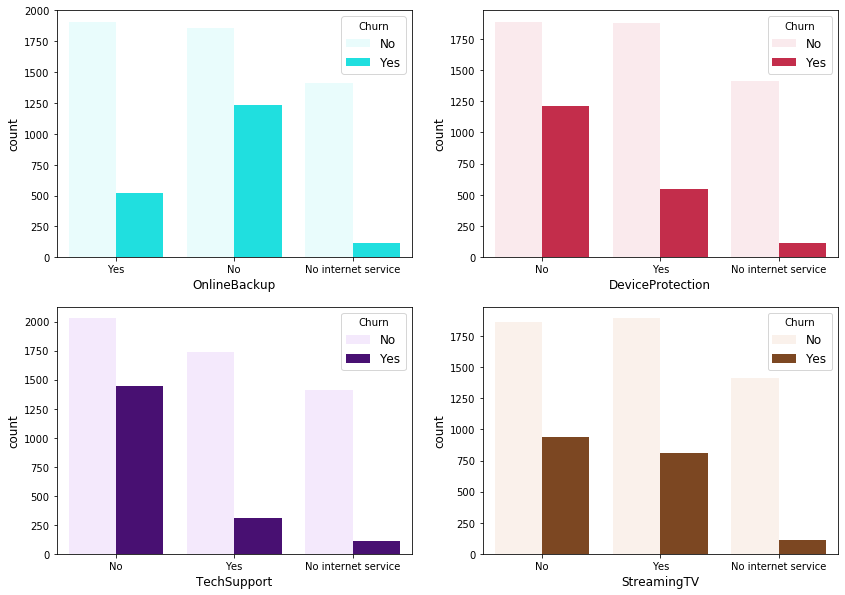

In [13]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('OnlineBackup',hue='Churn',data=dataset,color='aqua',ax=ax[0,0],)
sns.countplot('DeviceProtection',hue='Churn',data=dataset,color='crimson',ax=ax[0,1])
sns.countplot('TechSupport',hue='Churn',data=dataset,color='indigo',ax=ax[1,0])
sns.countplot('StreamingTV',hue='Churn',data=dataset,color='saddlebrown',ax=ax[1,1])


- Ensure proper tech support to elevate customer satisfaction and mitigate churn.
- People without any online backup service are more likely to leave the carrier.
- Device protection plan can be leveraged as a strong metric for customer loyalty.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

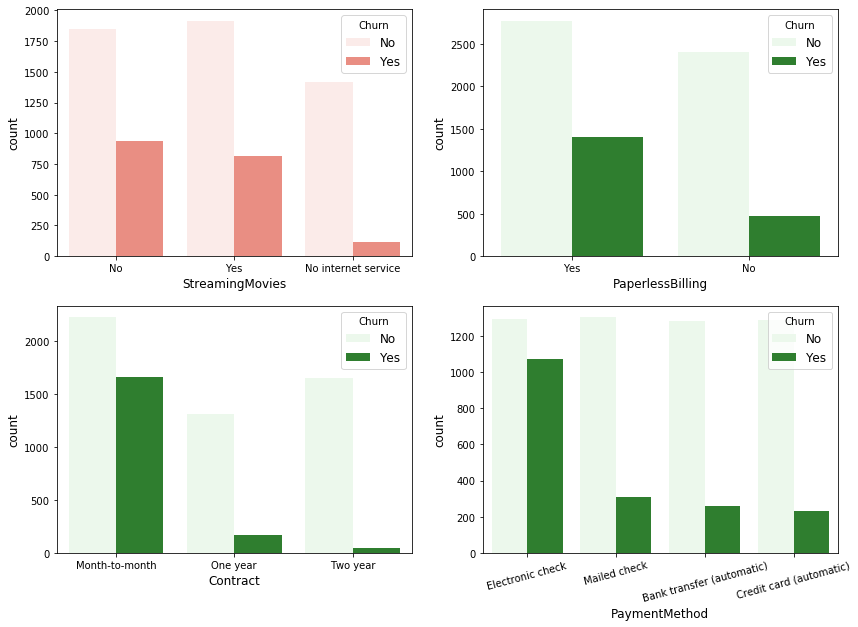

In [14]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('StreamingMovies',hue='Churn',data=dataset,color='salmon',ax=ax[0,0])
sns.countplot('PaperlessBilling',hue='Churn',data=dataset,color='forestgreen',ax=ax[0,1])
sns.countplot('Contract',hue='Churn',data=dataset,color='forestgreen',ax=ax[1,0])
sns.countplot('PaymentMethod',hue='Churn',data=dataset,color='forestgreen',ax=ax[1,1])
plt.xticks(rotation=15)



# <a id='2.3'>2.3 Summary Tables</a>

In [15]:
dataset.stb.freq(['TechSupport','Churn'],style="{:.2%}")

In [16]:
dataset.stb.freq(['InternetService','Churn'],style="{:.2%}")

- Of all the customer who left `1446` customers didn't have `TechSupport` and `1297` had fibre optic Internet Service

- That accounts for `77.4%` and `69.4%` of all the churns respectively

Looks like these two attributes can be strongly related with the `Churns` 

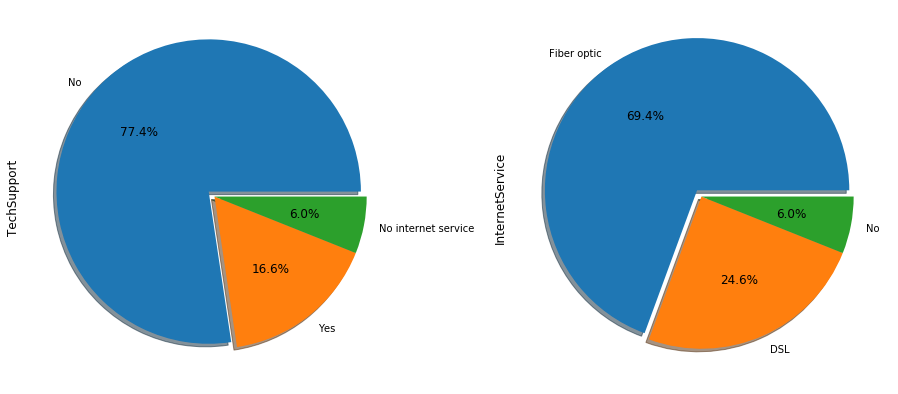

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
dataset[dataset['Churn']=='Yes']['TechSupport'].value_counts().plot.pie(explode=[0.05,0.0,0.0],autopct='%1.1f%%',shadow=True,ax=ax[0])
dataset[dataset['Churn']=='Yes']['InternetService'].value_counts().plot.pie(explode=[0.05,0.0,0.0],autopct='%1.1f%%',shadow=True,ax=ax[1]);

# <a id='2.4'>2.4 Demographics</a>

We don't have many demographics variables to analyse here, but can see how `gender` and `SeniorCitizen` play in.

In [18]:
def col_trans(col):
    X=[1 if i=='Yes' else 0 for i in col]
    return X

make_dollar = lambda x: "${:,.2f}".format(x)


In [19]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: orangered' if v else '' for v in is_max]



def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: palegreen' if v else '' for v in is_min]


def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0.1 else 'black'
    return 'color: %s' % color

In [20]:
dataset['Churn']=col_trans(dataset['Churn'])

In [21]:
demographics=dataset.groupby(['gender', 'SeniorCitizen']).agg({'customerID': ['count'],
                                                     'Churn':['sum'],
                                                       'MonthlyCharges': ['mean']}).reset_index()

In [22]:
demographics['Index']=(demographics['Churn']['sum']/demographics['customerID']['count'])
demographics['% Mix']=(demographics['customerID']['count']/np.sum(demographics['customerID']['count']))
demographics["MonthlyCharges"]=demographics["MonthlyCharges"]["mean"].apply(make_dollar)


In [23]:
demographics.columns=["Gender","SeniorCitizen","CustomerCount[A]","ChurnCount[B]","Avg. Monthly Rev","% Churn([A]/[B])","% Mix([A]/Sum[A])"]
demographics["% Mix([A]/Sum[A])"] = pd.Series(["{0:.2f}%".format(val * 100) for val in demographics["% Mix([A]/Sum[A])"]], index = demographics.index)
demographics['% Churn([A]/[B])'] = pd.Series(["{0:.2f}%".format(val * 100) for val in demographics['% Churn([A]/[B])']], index = demographics.index)

In [24]:
demographics.style.apply(highlight_max,subset=["Avg. Monthly Rev",'% Churn([A]/[B])'])

Sorry to disappoint you if you were looking for some nice chart, being an SQL guy I always feel that a nice and simple summary table is always richer in information than a complex chart.

- Looks like Churn Index is pretty high for the senior female citizens, they happen to be the most valued customers as well.
- However they only attribute 8% of our population, so we might want to reconsider before making any action plan or strategic investment.

# <a id='2.5'>2.5 Analysing Continuous Variables</a>

Text(0, 0.5, 'Monthly Charges')

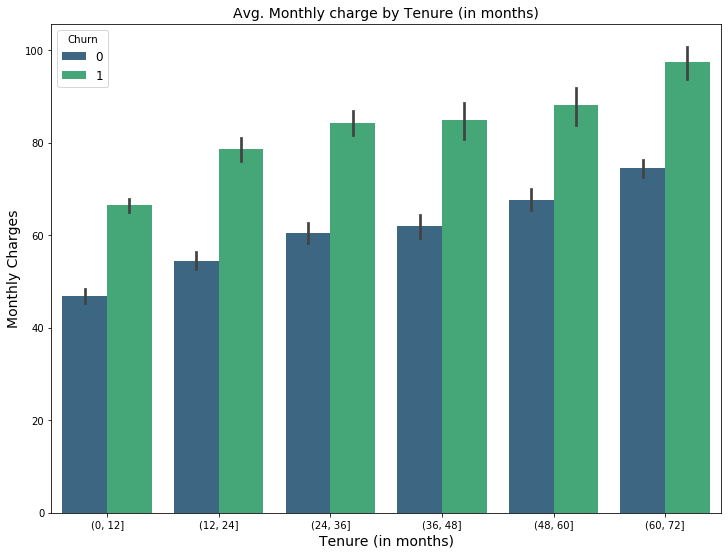

In [25]:
dataset['tenure_bins'] = pd.cut(x=dataset['tenure'], bins=[0,12, 24, 36,48,60,72])
plt.figure(figsize=(12,9))
sns.barplot(dataset['tenure_bins'],dataset['MonthlyCharges'],hue=dataset['Churn'],palette='viridis')
plt.title('Avg. Monthly charge by Tenure (in months)',fontsize=14)
plt.xlabel('Tenure (in months)',fontsize=14)
plt.ylabel('Monthly Charges',fontsize=14)

- We see a general trend here. People who have been with the carrier for long time tend to be spending more on average each month.
- Looks like we are losing more high valued customers throughout all tenure groups. This is in fact a great finding. Clearly, people with higher ARPU do not feel the services they are getting is worth the spending’s.

Text(0, 0.5, 'Total Charges')

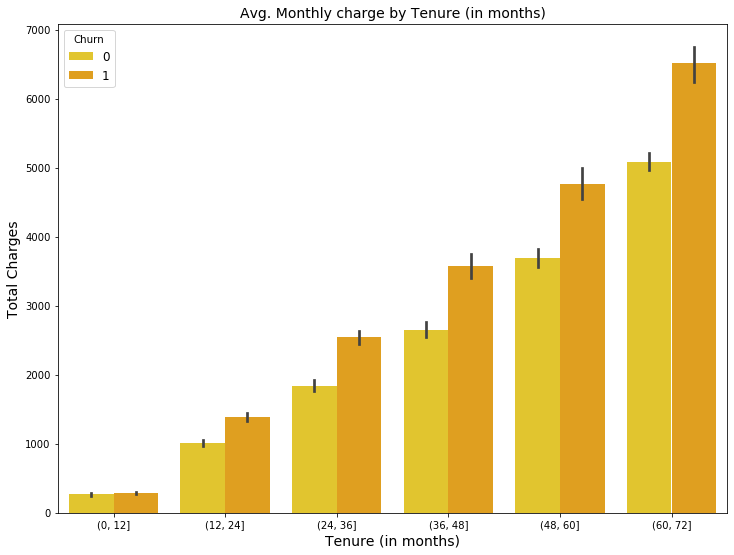

In [26]:
plt.figure(figsize=(12,9))
sns.barplot(dataset['tenure_bins'],dataset['TotalCharges'],hue=dataset['Churn'],palette='Wistia')
plt.title('Avg. Monthly charge by Tenure (in months)',fontsize=14)
plt.xlabel('Tenure (in months)',fontsize=14)
plt.ylabel('Total Charges',fontsize=14)

So, what do we see here?

- The distribution is highly skewed towards the higher tenure groups which is natural.

In [27]:
churn_by_tenure=dataset.groupby(['tenure_bins']).agg({'customerID': ['count'],
                                                     'Churn':['sum'],
                                                       }).reset_index()
churn_by_tenure.columns=['Tenure (in months)','# Customers','# Churns']
churn_by_tenure['Index']=churn_by_tenure['# Churns']/churn_by_tenure['# Customers']
churn_by_tenure['Index']=pd.Series(["{0:.2f}%".format(val * 100) for val in churn_by_tenure["Index"]], index = churn_by_tenure.index)
churn_by_tenure

Tenure (in months)  # Customers  # Churns   Index
0            (0, 12]         2175      1037  47.68%
1           (12, 24]         1024       294  28.71%
2           (24, 36]          832       180  21.63%
3           (36, 48]          762       145  19.03%
4           (48, 60]          832       120  14.42%
5           (60, 72]         1407        93   6.61%

Also, majority of churn comes from people who joined the carrier less than a year ago. There are two possibilities that are on top of mind:

- They didn't get service as expected. 
- A segment of these people are actually switchers who always are on a lookout for good offers and don't really mind switching carriers often.

Text(0.5, 1.0, 'Distribution of Total Charges with Monthly Charges by Tenure')

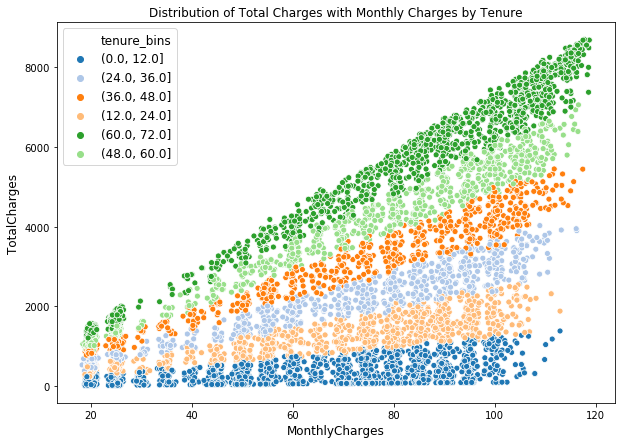

In [28]:
sns.scatterplot(x="MonthlyCharges",y="TotalCharges",hue="tenure_bins",data=dataset,palette='tab20')
plt.title('Distribution of Total Charges with Monthly Charges by Tenure')

Okay this might be a redundant plot, but just wanted to be sure. Everything make sense as people with higher ARPU tend to pay more in total over time.

# <a id='3'>3 Data Preprocessing</a>

We would also like to see how there features relate to each other and how strong is the correlation between them. But since our data has string values for most of the columns, we'd have to pre-process them before we can analyse them together.

- Columns with only two possible distinct values, are need to be Label Encoded.
- Categorical columns with more than two possible distinct values, are need to be One hot Encoded.

Let's identify those columns.

# <a id='3.1'>3.1 Identifying Columns</a>

In [29]:
#dataset.drop('tenure_bins',axis=1,inplace=True)
col_count=pd.DataFrame({"col_name":dataset.nunique().index,
              "Unique_Val":dataset.nunique()}).reset_index(drop=True)
def col_cat(col):  ##To differentiate the column types
    x=[]
    for i in col:
        if i ==2:
            x.append('Binary')
        elif (i>2) & (i<7):
            x.append('Categorical')
        else:
            x.append('Continuous')
    return x
        

col_count['Type']=col_cat(col_count["Unique_Val"])

col_count

col_name  Unique_Val         Type
0         customerID        7043   Continuous
1             gender           2       Binary
2      SeniorCitizen           2       Binary
3            Partner           2       Binary
4         Dependents           2       Binary
5             tenure          73   Continuous
6       PhoneService           2       Binary
7      MultipleLines           3  Categorical
8    InternetService           3  Categorical
9     OnlineSecurity           3  Categorical
10      OnlineBackup           3  Categorical
11  DeviceProtection           3  Categorical
12       TechSupport           3  Categorical
13       StreamingTV           3  Categorical
14   StreamingMovies           3  Categorical
15          Contract           3  Categorical
16  PaperlessBilling           2       Binary
17     PaymentMethod           4  Categorical
18    MonthlyCharges        1585   Continuous
19      TotalCharges        6531   Continuous
20             Churn           2       Binary
21       tenure_bins           6  Categorical

In [30]:
continuous=list(col_count[col_count["Type"]=='Continuous']['col_name'])
binary=list(col_count[col_count["Type"]=='Binary']['col_name'])
categorical=list(col_count[col_count["Type"]=='Categorical']['col_name'])
binary.pop(binary.index('Churn'))
continuous.pop(continuous.index('customerID'))

'customerID'

# <a id='3.2'>3.2 Label encoding</a>

In [31]:
le=LabelEncoder()
for i in binary:
    dataset[i]=le.fit_transform(dataset[i])

# <a id='3.3'>3.3 Co-relation Matrix</a>

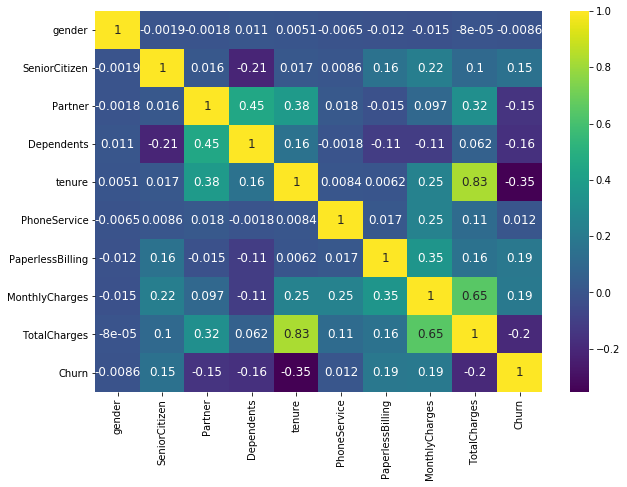

In [32]:
sns.heatmap(dataset.corr(),annot=True,cmap='viridis');

- Like we expected tenure has comparatively stronger negative relation with Churn.
- 1 new observation is the correlation between having a `Partner` and `Tenure`

# <a id='3.4'>3.4 One Hot Encoding</a>

In [33]:
X=dataset.drop('tenure_bins',axis=1)
y=X.iloc[:,-1]
X=X.iloc[:,1:-1]

In [34]:
categorical_ind=[i for i,j in enumerate(X.columns) if j in categorical]

In [35]:
X=X.values
y=y.values

In [36]:
# Let's check shape of X and y

print("Dimension of X vector:",X.shape)
print("Dimension of y labels:",y.shape)

Dimension of X vector: (7043, 19)
Dimension of y labels: (7043,)


In [37]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),list(categorical_ind))],remainder='passthrough')
X=np.array(ct.fit_transform(X))  ##Moves the dummy columns to the begining

# <a id='3.5'>3.5 Splitting training and Test Data</a>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# <a id='3.6'>3.6 Feature Scaling</a>

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <a id='4'>4 Model Building</a>

In [40]:
def capcurve(y_values, y_preds_proba): ##Cap Curve for model performance
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    

    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index( drop=True)

    #print(y_cap_df_s.head(20))

    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0

    percent = 0.5
    row_index = int(np.trunc(num_count * percent))

    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)

    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)

    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    #ar_label = 'ar value = %s' % ar_value
    val=np.round(val,2)

    fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(10,7))
    ax.plot(ideal['x'],ideal['y'], color='C0', label='Perfect Model',lw=2,marker='o')
    ax.plot(xx,yy, color='red', label='Our Model')
    #ax.scatter(xx,yy, color='red')
    ax.plot(xx,xx, color='blue', label='Random Model',lw=2)
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=2)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=2, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')

    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title(f"CAP Curve - a_r value ={ar_value:.2f}")
    plt.xlabel('% of the data')
    plt.ylabel('% of Positive obs (Churn=1)')
    plt.legend()
    plt.show()
    return val


# <a id='4.1'>4.1 Logistic Regression</a>

In [41]:
def classifier_Logistic(X_train,y_train,X_test,y_test):  
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred_prob=classifier.predict_proba(X_test)
    y_pred = classifier.predict(X_test)
    val_accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    plt.style.use('seaborn')
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    plot_roc_curve(classifier,X_test,y_test,ax=ax[0])
    plot_precision_recall_curve(classifier,X_test,y_test,ax=ax[1])
    ax[0].set_title("ROC Curve")
    ax[1].set_title("Precision vs Recall Curve")
    val=capcurve(y_test,y_pred_prob[:,1])
    precision=average_precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    #plt.style.use('default')
    #plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
    pcm(cm,colorbar=True,show_normed=True)
    plt.title('Confusion Matrix')
    plt.show()
    score={"accuracy":val_accuracy,
           "con_mat":cm,
           "y_pred":y_pred,
           "y_pred_prob":y_pred_prob,
           "classifier":classifier,
           "CAC":val,
          "precision":precision,
          "recall":recall}
    print(f"Validation Accuracy of the Logistic Regression model is {val_accuracy:.2f}%")
    return score

# <a id='4.2'>4.2 Support Vector Classifier</a>

In [42]:
def classifier_SVC(X_train,y_train,X_test,y_test,kernel='linear'):  
    classifier = SVC(kernel=kernel,random_state = 0,probability=True)
    classifier.fit(X_train, y_train)
    y_pred_prob=classifier.predict_proba(X_test)
    y_pred = classifier.predict(X_test)
    val_accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    plt.style.use('seaborn')
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    plot_roc_curve(classifier,X_test,y_test,ax=ax[0])
    plot_precision_recall_curve(classifier,X_test,y_test,ax=ax[1])
    ax[0].set_title("ROC Curve")
    ax[1].set_title("Precision vs Recall Curve")
    val=capcurve(y_test,y_pred_prob[:,1])
    precision=average_precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    #plt.style.use('default')
    #plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
    pcm(cm,colorbar=True,show_normed=True)
    plt.title('Confusion Matrix')
    plt.show()
    score={"accuracy":val_accuracy,
           "con_mat":cm,
           "y_pred":y_pred,
           "y_pred_prob":y_pred_prob,
           "classifier":classifier,
           "CAC":val,
          "precision":precision,
          "recall":recall}

    print(f"Validation Accuracy of the Support Vector model is {val_accuracy:.2f}%")
    return score

# <a id='4.3'>4.3 K Nearest Neighbors Classifier</a>

In [43]:
def classifier_KNN(X_train,y_train,X_test,y_test,n_neighbors=5):  
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors,p=2,metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred_prob=classifier.predict_proba(X_test)
    y_pred = classifier.predict(X_test)
    val_accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    plt.style.use('seaborn')
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    plot_roc_curve(classifier,X_test,y_test,ax=ax[0])
    plot_precision_recall_curve(classifier,X_test,y_test,ax=ax[1])
    ax[0].set_title("ROC Curve")
    ax[1].set_title("Precision vs Recall Curve")
    val=capcurve(y_test,y_pred_prob[:,1])
    precision=average_precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    #plt.style.use('default')
    #plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
    pcm(cm,colorbar=True,show_normed=True)
    plt.title('Confusion Matrix')
    plt.show()
    score={"accuracy":val_accuracy,
           "con_mat":cm,
           "y_pred":y_pred,
           "y_pred_prob":y_pred_prob,
           "classifier":classifier,
           "CAC":val,
          "precision":precision,
          "recall":recall}
    
    print(f"Validation Accuracy of the KNN model is {val_accuracy:.2f}%")
    return score

# <a id='4.4'>4.4 Decision Tree Classifier</a>

In [44]:
def classifier_Tree(X_train,y_train,X_test,y_test,criterion='entropy'):  
    classifier = DecisionTreeClassifier(criterion=criterion)
    classifier.fit(X_train, y_train)
    y_pred_prob=classifier.predict_proba(X_test)
    y_pred = classifier.predict(X_test)
    val_accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    plt.style.use('seaborn')
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    plot_roc_curve(classifier,X_test,y_test,ax=ax[0])
    plot_precision_recall_curve(classifier,X_test,y_test,ax=ax[1])
    ax[0].set_title("ROC Curve")
    ax[1].set_title("Precision vs Recall Curve")
    val=capcurve(y_test,y_pred_prob[:,1])
    precision=average_precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    #plt.style.use('default')
    #plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
    pcm(cm,colorbar=True,show_normed=True)
    plt.title('Confusion Matrix')
    plt.show()
    score={"accuracy":val_accuracy,
           "con_mat":cm,
           "y_pred":y_pred,
           "y_pred_prob":y_pred_prob,
           "classifier":classifier,
           "CAC":val,
          "precision":precision,
          "recall":recall}

    print(f"Validation Accuracy of Decision Tree the model is {val_accuracy:.2f}%")
    return score

# <a id='4.5'>4.5 Random Forest Classifier</a>

In [45]:
def classifier_RF(X_train,y_train,X_test,y_test,n_estimators=10,criterion='entropy'):  
    classifier = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion)
    classifier.fit(X_train, y_train)
    y_pred_prob=classifier.predict_proba(X_test)
    y_pred = classifier.predict(X_test)
    val_accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    plt.style.use('seaborn')
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    plot_roc_curve(classifier,X_test,y_test,ax=ax[0])
    plot_precision_recall_curve(classifier,X_test,y_test,ax=ax[1])
    ax[0].set_title("ROC Curve")
    ax[1].set_title("Precision vs Recall Curve")
    val=capcurve(y_test,y_pred_prob[:,1])
    precision=average_precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    #plt.style.use('default')
    #plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
    pcm(cm,colorbar=True,show_normed=True)
    plt.title('Confusion Matrix')
    plt.show()
    score={"accuracy":val_accuracy,
           "con_mat":cm,
           "y_pred":y_pred,
           "y_pred_prob":y_pred_prob,
           "classifier":classifier,
           "CAC":val,
          "precision":precision,
          "recall":recall}
    

    print(f"Validation Accuracy of the Random Forest model is {val_accuracy:.2f}%")
    return score

# <a id='4.6'>4.6 Naive Bayes Classifier</a>

In [46]:
def classifier_NaiveB(X_train,y_train,X_test,y_test):  
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred_prob=classifier.predict_proba(X_test)
    y_pred = classifier.predict(X_test)
    val_accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    plt.style.use('seaborn')
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    plot_roc_curve(classifier,X_test,y_test,ax=ax[0])
    plot_precision_recall_curve(classifier,X_test,y_test,ax=ax[1])
    ax[0].set_title("ROC Curve")
    ax[1].set_title("Precision vs Recall Curve")
    val=capcurve(y_test,y_pred_prob[:,1])
    precision=average_precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    #plt.style.use('default')
    #plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
    pcm(cm,colorbar=True,show_normed=True)
    plt.title('Confusion Matrix')
    plt.show()
    score={"accuracy":val_accuracy,
           "con_mat":cm,
           "y_pred":y_pred,
           "y_pred_prob":y_pred_prob,
           "classifier":classifier,
           "CAC":val,
          "precision":precision,
          "recall":recall}

    print(f"Validation Accuracy of the Naive Bayers model is {val_accuracy:.2f}%")
    return score

Out of curiosity let's create a simple ANN and see how it performs with respect to all the other models.

# <a id='4.7'>4.7 Artificial Neural Network</a>

In [47]:
def classifier_ANN(X_train,y_train,X_test,y_test,epochs=100,batch_size=32,optimizer='adam',loss='binary_crossentropy'): 
    classifier=Sequential()

    #Creating the input layer and first hidden layer
    classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=40))  ## Check all the other params

    #adding 2nd hidden Layer
    classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))


    #adding 3rd hidden Layer
    #classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))

    #Adding the output layer
    classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

    #Compiling the ANN
    classifier.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

    #Fitting ANN to training set
    classifier.fit(X_train,y_train,batch_size=batch_size,epochs=epochs)
    y_pred_prob=classifier.predict(X_test)
    y_pred=(y_pred_prob>0.5).astype('int')
    val_accuracy=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    
    
    
    plt.style.use('seaborn')
    #fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    #plot_roc_curve(classifier,X_test,y_test,ax=ax[0])
    #plot_precision_recall_curve(classifier,X_test,y_test,ax=ax[1])
    #ax[0].set_title("ROC Curve")
    #ax[1].set_title("Precision vs Recall Curve")
    val=capcurve(y_test,y_pred_prob)
    precision=average_precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    #plt.style.use('default')
    #plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
    pcm(cm,colorbar=True,show_normed=True)
    plt.title('Confusion Matrix')
    plt.show()
    score={"accuracy":val_accuracy,
           "con_mat":cm,
           "y_pred":y_pred,
           "y_pred_prob":y_pred_prob,
           "classifier":classifier,
           "CAC":val,
          "precision":precision,
          "recall":recall}

    
    
    #score=(val_accuracy,cm,y_pred,y_pred_prob)
    print(f"Validation Accuracy of the ANN model is {val_accuracy:.2f}%")
    
    return score

# <a id='5'>5 Prediction and Model Performance</a>

Now all of our models are defined. Let predict our results, compare them and choose the best one.

For understanding our model performance, we are going to analyse the following things:
- Accuracy: This is simple the ratio of correct prediction and total number of observations.
- Receiver Operating Characteristics: It is a plot between `False Positive Rate` and `True Positive Rate`. ROC curve tells us how capable our model is to distinguish between right classes by observing the area under the curve. The goal should be to maximize the area.
        Further Readings: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
        
- Recall vs Precision: In our current problem we are more focused on identifying the users who may walk out of the subscription. For us a False Negative is more dangerous than a `False Positive` and hence in case of tough competition in terms of other metrics we may choose a model with higher `recall` at the cost of `precision`. 

    $$Recall = \frac{True Positives}{True Positives + False Negatives} $$
    
    $$Precision = \frac{True Positives}{True Positives + False Positives}$$
    
        Further Readings: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
        
- Cumulative Accuracy Profile: Although it may look similar to the `ROC` curve, `CAP` curve plots the % of Positives correctly classified with % of data analysed. Say out of `1000` people who came for a test `50` are positive (5%). Hence the ideal model would reach `100%` of `True Positive` results just after going through `5%` of the data. By calculating the area under CAP curve, we can have a better understanding of the performance of our model. Generally, a model performance is analysed based % of True positives the model can detect by going over 50% of the data. We will call that `CAP score`.



- Confusion Metrix: Well, this is the go-to metric to analyse how well our model is performing. Best thing is, contradictory to its name, it is one of the simplest metrics to analyse.

# <a id='5.1'>5.1 Logistic Regression</a>

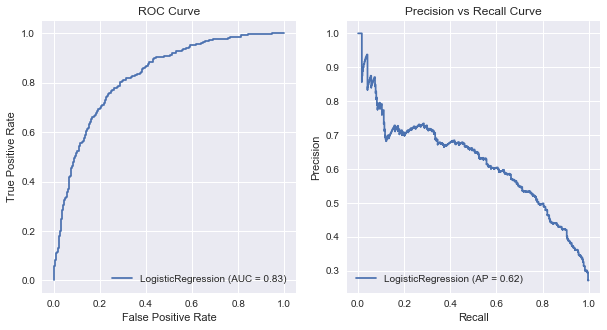

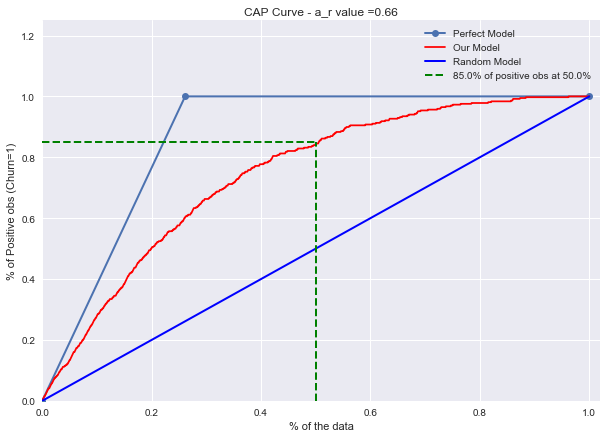

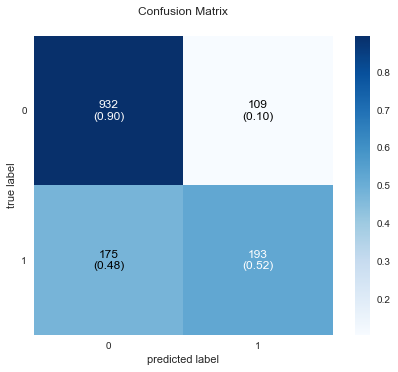

Validation Accuracy of the Logistic Regression model is 0.80%


In [48]:
Score_Log=classifier_Logistic(X_train,y_train,X_test,y_test)

# <a id='5.2'>5.2 Support Vector Classifier</a>

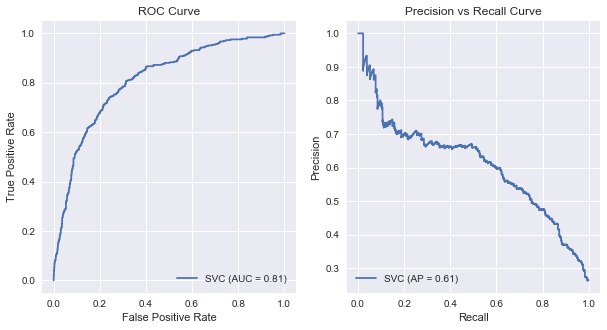

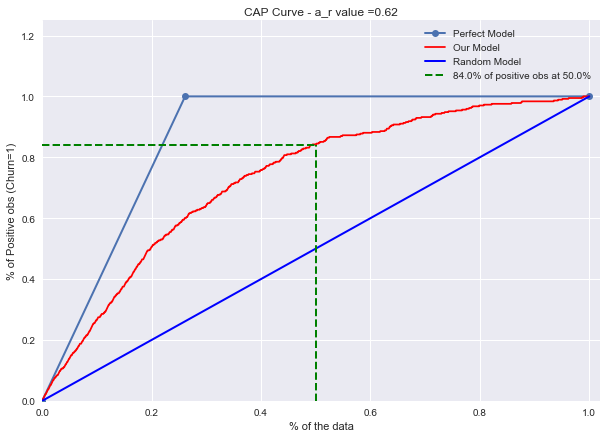

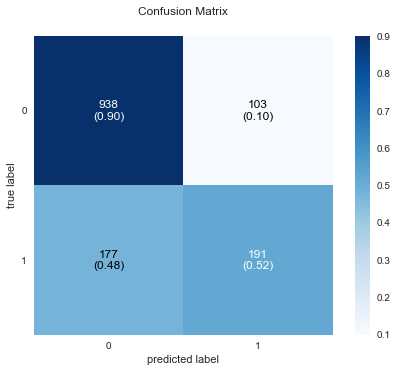

Validation Accuracy of the Support Vector model is 0.80%


In [49]:
Score_SVCL=classifier_SVC(X_train,y_train,X_test,y_test)

# <a id='5.3'>5.3 Kernel Classifier</a>

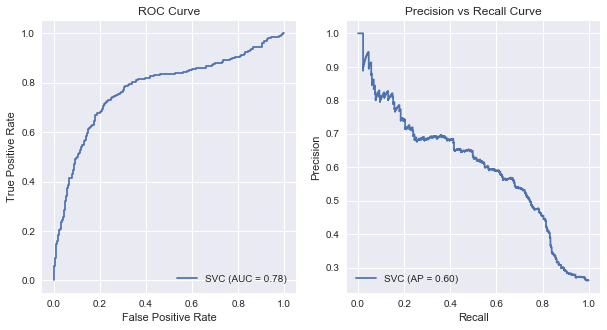

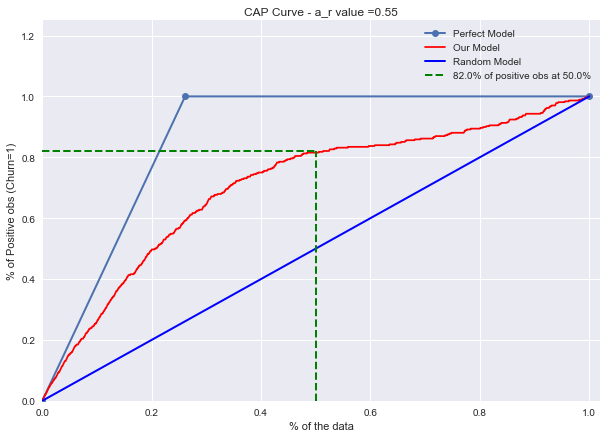

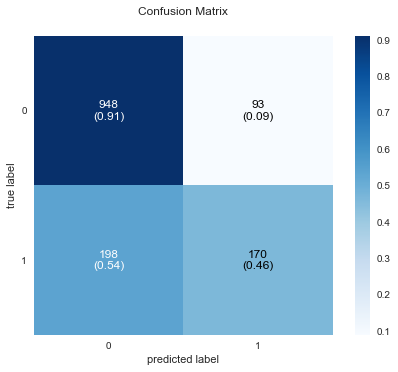

Validation Accuracy of the Support Vector model is 0.79%


In [50]:
Score_SVCR=classifier_SVC(X_train,y_train,X_test,y_test,kernel='rbf')

# <a id='5.4'>5.4 K Nearest Neighbors</a>

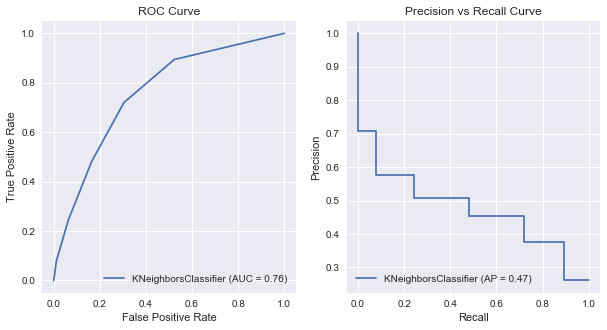

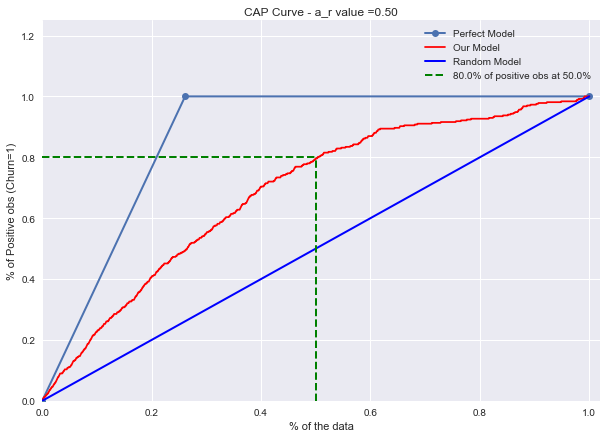

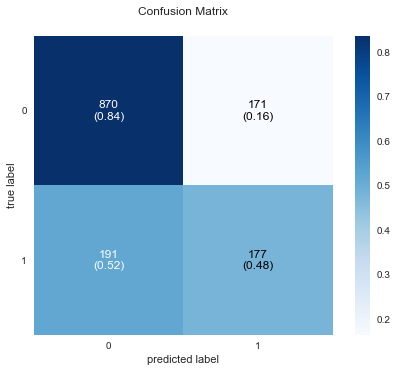

Validation Accuracy of the KNN model is 0.74%


In [51]:
Score_KNN=classifier_KNN(X_train,y_train,X_test,y_test)

# <a id='5.5'>5.5 Decision Tree Classification</a>

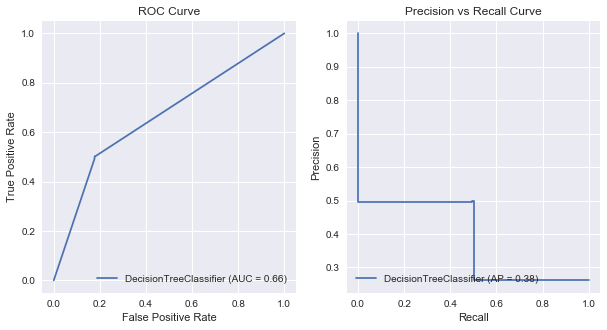

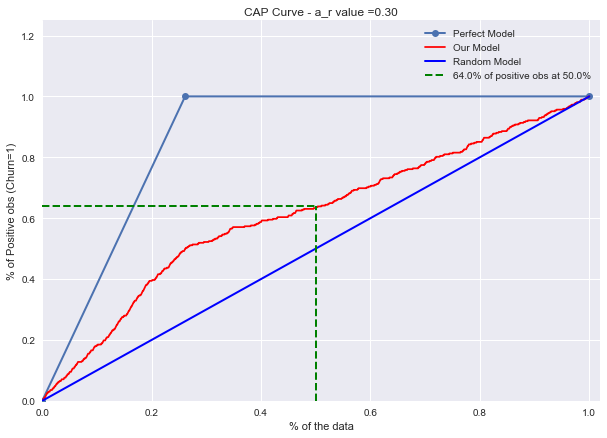

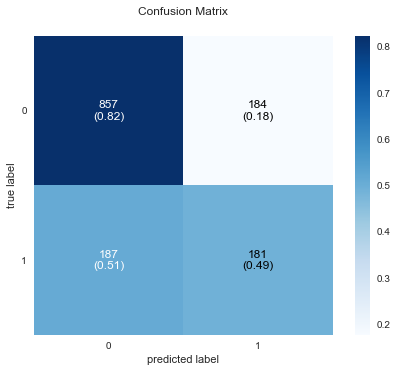

Validation Accuracy of Decision Tree the model is 0.74%


In [52]:
Score_Tree=classifier_Tree(X_train,y_train,X_test,y_test)

# <a id='5.6'>5.6 Rando Forest Classification</a>

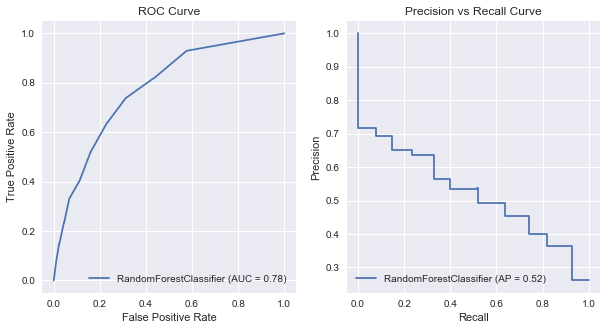

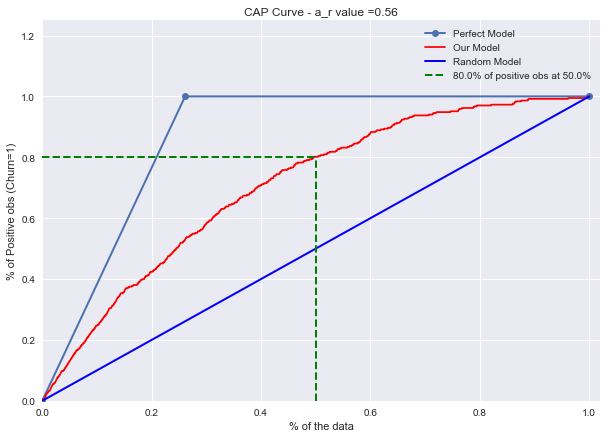

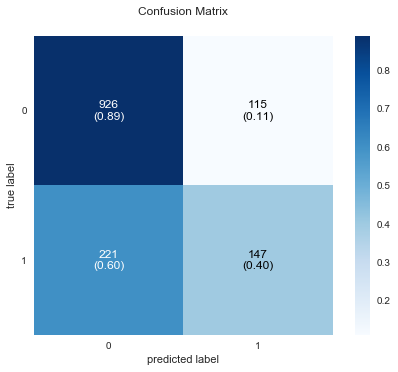

Validation Accuracy of the Random Forest model is 0.76%


In [53]:
Score_RF=classifier_RF(X_train,y_train,X_test,y_test)

# <a id='5.7'>5.7 Naive Bayes Classification</a>

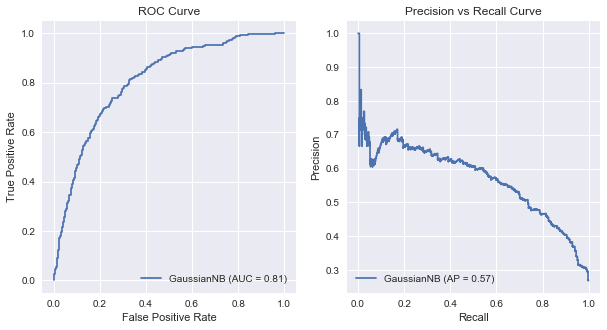

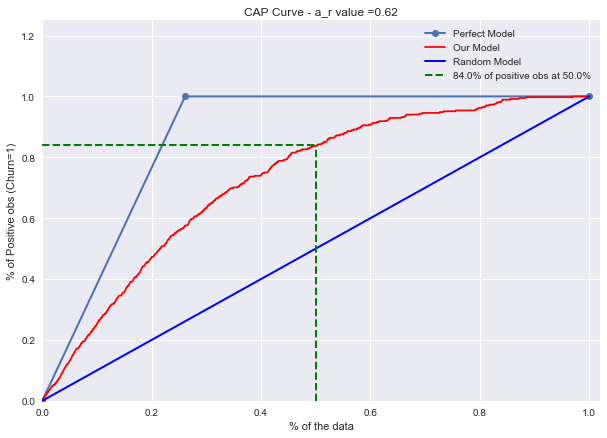

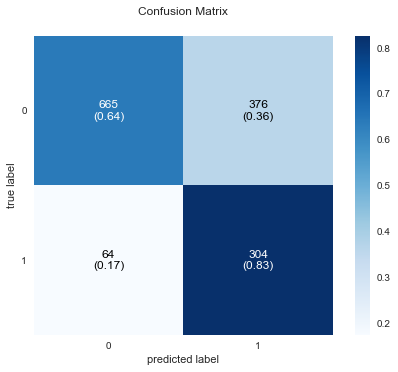

Validation Accuracy of the Naive Bayers model is 0.69%


In [54]:
Score_NaiveB=classifier_NaiveB(X_train,y_train,X_test,y_test)

# <a id='5.8'>5.8 Artificial Neural Network</a>

Epoch 1/10
5634/5634 [==============================] - 0s 48us/step - loss: 0.6171 - accuracy: 0.7318
Epoch 2/10
5634/5634 [==============================] - 0s 23us/step - loss: 0.4433 - accuracy: 0.7882
Epoch 3/10
5634/5634 [==============================] - 0s 24us/step - loss: 0.4268 - accuracy: 0.7969
Epoch 4/10
5634/5634 [==============================] - 0s 26us/step - loss: 0.4222 - accuracy: 0.7975
Epoch 5/10
5634/5634 [==============================] - 0s 25us/step - loss: 0.4189 - accuracy: 0.8016
Epoch 6/10
5634/5634 [==============================] - 0s 25us/step - loss: 0.4167 - accuracy: 0.8009
Epoch 7/10
5634/5634 [==============================] - 0s 24us/step - loss: 0.4147 - accuracy: 0.8030
Epoch 8/10
5634/5634 [==============================] - 0s 23us/step - loss: 0.4134 - accuracy: 0.8033
Epoch 9/10
5634/5634 [==============================] - 0s 25us/step - loss: 0.4125 - accuracy: 0.8053
Epoch 10/10
5634/5634 [==============================] - 0s 24us/step - l

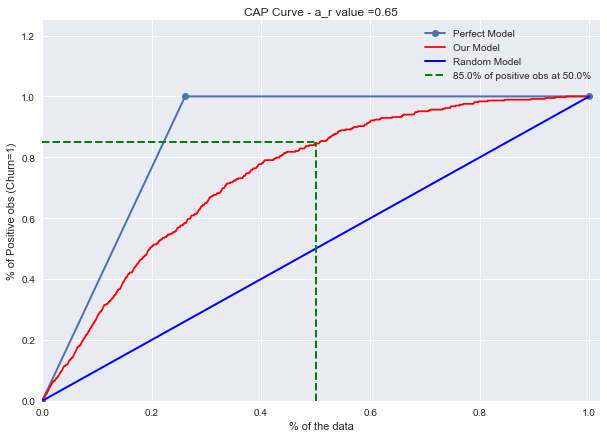

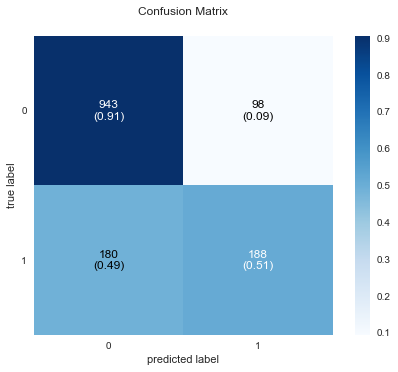

Validation Accuracy of the ANN model is 0.80%


In [55]:
Score_ANN=classifier_ANN(X_train,y_train,X_test,y_test,epochs=10)

# <a id='6'>6 Model Comparision</a>

In [56]:
metrics={}
for metric in Score_Log.keys():
    metrics[metric]=[Score_Log[metric],Score_NaiveB[metric],Score_KNN[metric],Score_SVCL[metric],Score_SVCR[metric],Score_Tree[metric],Score_RF[metric],Score_KNN[metric]]

In [57]:
modelnames=['Log Reg',
            'Naive Bayes',
            'KNN','SVM','Kernel','Tree','Random Forest','Artificial NN']

metrics['ModelNames']=modelnames
model_summary=pd.DataFrame(metrics)

In [58]:
model_summary=model_summary[['ModelNames','accuracy','precision','recall','CAC','con_mat']]
model_summary.columns=['Model Names','Accuracy','Precision','Recall','CAC Score','Confusion Mat']
model_summary=model_summary.round(3)

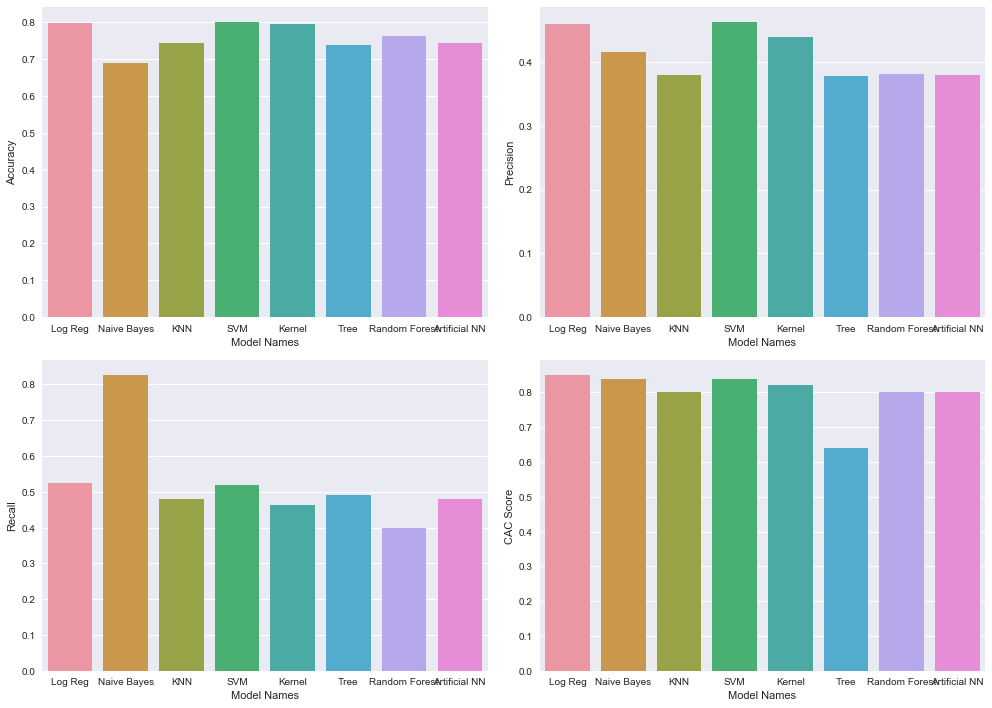

In [59]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(14,10))

sns.barplot(model_summary['Model Names'],model_summary['Accuracy'],ax=ax[0,0])

sns.barplot(model_summary['Model Names'],model_summary['Precision'],ax=ax[0,1])

sns.barplot(model_summary['Model Names'],model_summary['Recall'],ax=ax[1,0])

sns.barplot(model_summary['Model Names'],model_summary['CAC Score'],ax=ax[1,1])

plt.tight_layout()


# <a id='6.1'>6.1 Summary Table</a>

In [60]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(model_summary.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[model_summary['Model Names'], model_summary['Accuracy'], model_summary['Precision'], model_summary['Recall'],model_summary['CAC Score'],model_summary['Confusion Mat']],
               fill_color='lavender',
               align='left'))
])

fig.show()

Here is a summary of our findings:

- Customers with fiber optic service as home Internet, are more likely to churn.
- Absence of Tech Support is leading to more churns than overall as of all the churns 77.4% didn’t have tech support.
- People with Device protection plan can be considered as low risk.
- Demographically, Senior female citizens are at a higher risk.
- Customers who have been with the company longer are on average paying more every month and are less likely to churn.
- However, within each tenure group, high valued customers are more likely to churn compared to the ones paying less.
- People who joined less than 1 year ago are at highest risk customers as 47% of them have left within first year of joining.
- Naïve Bayes gives least false negatives but overall has less accuracy.
- Linear SVM outperforms all the other models in terms of accuracy, but recall could be increased.
- Complex ensemble method, like Random forest and deep methods don’t look promising at all.

### Thank you for your time. Feel free to drop any feedback.